# HCDS A1: Data Curation

## Step 1: Gathering the data

Import necessary libraries

In [1]:
import json
import requests
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

Defining the endpoints for The Legacy Pagecounts API and The Pageviews API

In [2]:
endpoint_pagecounts = 'https://wikimedia.org/api/rest_v1/metrics/legacy/pagecounts/aggregate/{project}/{access-site}/{granularity}/{start}/{end}'
endpoint_pageviews = 'https://wikimedia.org/api/rest_v1/metrics/pageviews/aggregate/{project}/{access}/{agent}/{granularity}/{start}/{end}'

Defining the api_call function and header parameters

In [3]:
headers = {
    'User-Agent': 'https://github.com/samarthjmodi',
    'From': 'sjmodi@uw.edu'
}

def api_call(endpoint,parameters):
    call = requests.get(endpoint.format(**parameters), headers=headers)
    response = call.json()
    return response

Create json file for **Legacy Pagecounts API for desktop** traffic data

In [4]:
# Define parameters for API call
pagecounts_params_desktop = {"project" : "en.wikipedia.org",
                 "access-site" : "desktop-site",
                 "granularity" : "monthly",
                 "start" : "2008010100",
                 "end" : "2016080100"
                    }

# Object containing data obtained from API call
pagecounts_desktop_site = api_call(endpoint_pagecounts, pagecounts_params_desktop)

# Dump object data to json file
with open('pagecounts_desktop-site_200801-201607.json', 'w') as json_file:
    json.dump(pagecounts_desktop_site, json_file)

Create json file for **Legacy Pagecounts API for mobile** traffic data

In [5]:
# Define parameters for API call
pagecounts_params_mobile = {"project" : "en.wikipedia.org",
                 "access-site" : "mobile-site",
                 "granularity" : "monthly",
                 "start" : "2008010100",
                 "end" : "2016080100"
                    }

# Object containing data obtained from API call
pagecounts_mobile_site = api_call(endpoint_pagecounts, pagecounts_params_mobile)

# Dump object data to json file
with open('pagecounts_mobile-site_200801-201607.json', 'w') as json_file:
    json.dump(pagecounts_mobile_site, json_file)

Create json file for **Pageviews API for desktop** traffic data

In [6]:
# Define parameters for API call
pageviews_params_desktop = {"project" : "en.wikipedia.org",
                    "access" : "desktop",
                    "agent" : "user",
                    "granularity" : "monthly",
                    "start" : "2015070100",
                    "end" : '2020090100'
                        }

# Object containing data obtained from API call
pageviews_desktop_site = api_call(endpoint_pageviews, pageviews_params_desktop)

# Dump object data to json file
with open('pageviews_desktop_201507-202008.json', 'w') as json_file:
    json.dump(pageviews_desktop_site, json_file)

Create json file for  **Pageviews API for mobile web** traffic data

In [7]:
# Define parameters for API call
pageviews_params_mobile_web = {"project" : "en.wikipedia.org",
                    "access" : "mobile-web",
                    "agent" : "user",
                    "granularity" : "monthly",
                    "start" : "2015070100",
                    "end" : '2020090100'
                        }

# Object containing data obtained from API call
pageviews_mobile_web = api_call(endpoint_pageviews, pageviews_params_mobile_web)

# Dump object data to json file
with open('pageviews_mobile-web_201507-202008.json', 'w') as json_file:
    json.dump(pageviews_mobile_web, json_file)

Create json file for **Pageviews API for mobile app** traffic data

In [8]:
# Define parameters for API call
pageviews_params_mobile_app = {"project" : "en.wikipedia.org",
                    "access" : "mobile-app",
                    "agent" : "user",
                    "granularity" : "monthly",
                    "start" : "2015070100",
                    "end" : '2020090100'
                        }

# Object containing data obtained from API call
pageviews_mobile_app = api_call(endpoint_pageviews, pageviews_params_mobile_app)

# Dump object data to json file
with open('pageviews_mobile-app_201507-202008.json', 'w') as json_file:
    json.dump(pageviews_mobile_app, json_file)

## Step 2: Processing the data

Loding json files into local objects

In [9]:
# Legacy Pagecounts API for desktop
with open('pagecounts_desktop-site_200801-201607.json') as file:
    pagecounts_desktop = json.load(file)
    
# Legacy Pagecounts API for mobile
with open('pagecounts_mobile-site_200801-201607.json') as file:
    pagecounts_mobile = json.load(file)

# Pageviews API for desktop
with open('pageviews_desktop_201507-202008.json') as file:
    pageviews_desktop = json.load(file)

# Pageviews API for mobile web
with open('pageviews_mobile-web_201507-202008.json') as file:
    pageviews_mobile_web = json.load(file)
    
# Pageviews API for mobile app
with open('pageviews_mobile-app_201507-202008.json') as file:
    pageviews_mobile_app = json.load(file)

Merge pageviews_mobile_web and pageviews_mobile_app into single json object: pageviews_mobile

In [11]:
# Load pageviews_mobile_web json file to pageviews_mobile
with open('pageviews_mobile-web_201507-202008.json') as file:
    pageviews_mobile = json.load(file)

# Add view count for pageviews_mobile_app to pageviews_mobile for each timestamp (month)
for i in pageviews_mobile['items']:
    i['access'] = 'mobile'
    for j in pageviews_mobile_app['items']:
        if i['timestamp'] == j['timestamp']:
            i['views'] += j['views']
            break

Extract year and month values from timestamp for each json object

In [12]:
# Extract year and month values and delete timestamp for pagecounts_desktop
for i in pagecounts_desktop['items']:
    i['year'] = int(i['timestamp'][:4])
    i['month'] = int(i['timestamp'][4:6])
    del i['timestamp']

# Extract year and month values and delete timestamp for pagecounts_mobile
for i in pagecounts_mobile['items']:
    i['year'] = int(i['timestamp'][:4])
    i['month'] = int(i['timestamp'][4:6])
    del i['timestamp']

# Extract year and month values and delete timestamp for pageviews_desktop
for i in pageviews_desktop['items']:
    i['year'] = int(i['timestamp'][:4])
    i['month'] = int(i['timestamp'][4:6])
    del i['timestamp']

# Extract year and month values and delete timestamp for pageviews_mobile
for i in pageviews_mobile['items']:
    i['year'] = int(i['timestamp'][:4])
    i['month'] = int(i['timestamp'][4:6])
    del i['timestamp']


Create Pandas DataFrame for each json object, and retain only relevant fields

In [13]:
# Create DataFrame for pagecounts_desktop
pagecounts_desktop_df =  pd.DataFrame(pagecounts_desktop['items'])
pagecounts_desktop_df = pagecounts_desktop_df[['year', 'month', 'count']]
pagecounts_desktop_df = pagecounts_desktop_df.rename(columns={"count": "pagecount_desktop_views"})

In [14]:
# Create DataFrame for pagecounts_mobile
pagecounts_mobile_df =  pd.DataFrame(pagecounts_mobile['items'])
pagecounts_mobile_df = pagecounts_mobile_df[['year', 'month', 'count']]
pagecounts_mobile_df = pagecounts_mobile_df.rename(columns={"count": "pagecount_mobile_views"})

In [15]:
# Create DataFrame for pageviews_desktop
pageviews_desktop_df =  pd.DataFrame(pageviews_desktop['items'])
pageviews_desktop_df = pageviews_desktop_df[['year', 'month', 'views']]
pageviews_desktop_df = pageviews_desktop_df.rename(columns={"views": "pageview_desktop_views"})

In [16]:
# Create DataFrame for pageviews_mobile
pageviews_mobile_df =  pd.DataFrame(pageviews_mobile['items'])
pageviews_mobile_df = pageviews_mobile_df[['year', 'month', 'views']]
pageviews_mobile_df = pageviews_mobile_df.rename(columns={"views": "pageview_mobile_views"})

Outer join all dataframes into a single dataframe on year and month fields

In [17]:
df = pd.DataFrame(pagecounts_desktop_df)
df = df.merge(pagecounts_mobile_df, on = ['year', 'month'], how = 'outer')
df = df.merge(pageviews_desktop_df, on = ['year', 'month'], how = 'outer')
df = df.merge(pageviews_mobile_df, on = ['year', 'month'], how = 'outer')

# Replace NULLs with 0
df = df.fillna(0)

Create total pagecount view field and total pageview view field

In [18]:
# Total views = Desktop views + Mobile views
df['pagecount_all_views'] = df['pagecount_desktop_views'] + df['pagecount_mobile_views']
df['pageview_all_views'] = df['pageview_desktop_views'] + df['pageview_mobile_views']

# Get the columns in proper arrangement
df = df[['year', 'month', 'pagecount_all_views', 'pagecount_desktop_views', 'pagecount_mobile_views', 'pageview_all_views', 'pageview_desktop_views', 'pageview_mobile_views']]

Dump final dataframe to a csv file

In [19]:
df.to_csv('en-wikipedia_traffic_200712-202008.csv')

## Step 3: Analyze the data

Load the above created csv to new dataframe

In [20]:
ndf = pd.read_csv('en-wikipedia_traffic_200712-202008.csv', index_col = 0)

# Replaced 0s with NULLs for better visualization
ndf.replace(0, np.nan, inplace=True)

Create a new field of type date for use as x-axis while plotting, by concatenation of year and month

In [21]:
ndf['date'] = ndf['year'].astype('str') + '-' + ndf['month'].astype('str')
ndf['date'] = pd.to_datetime(ndf['date'])

Visualize the data, and exporting the visual to png

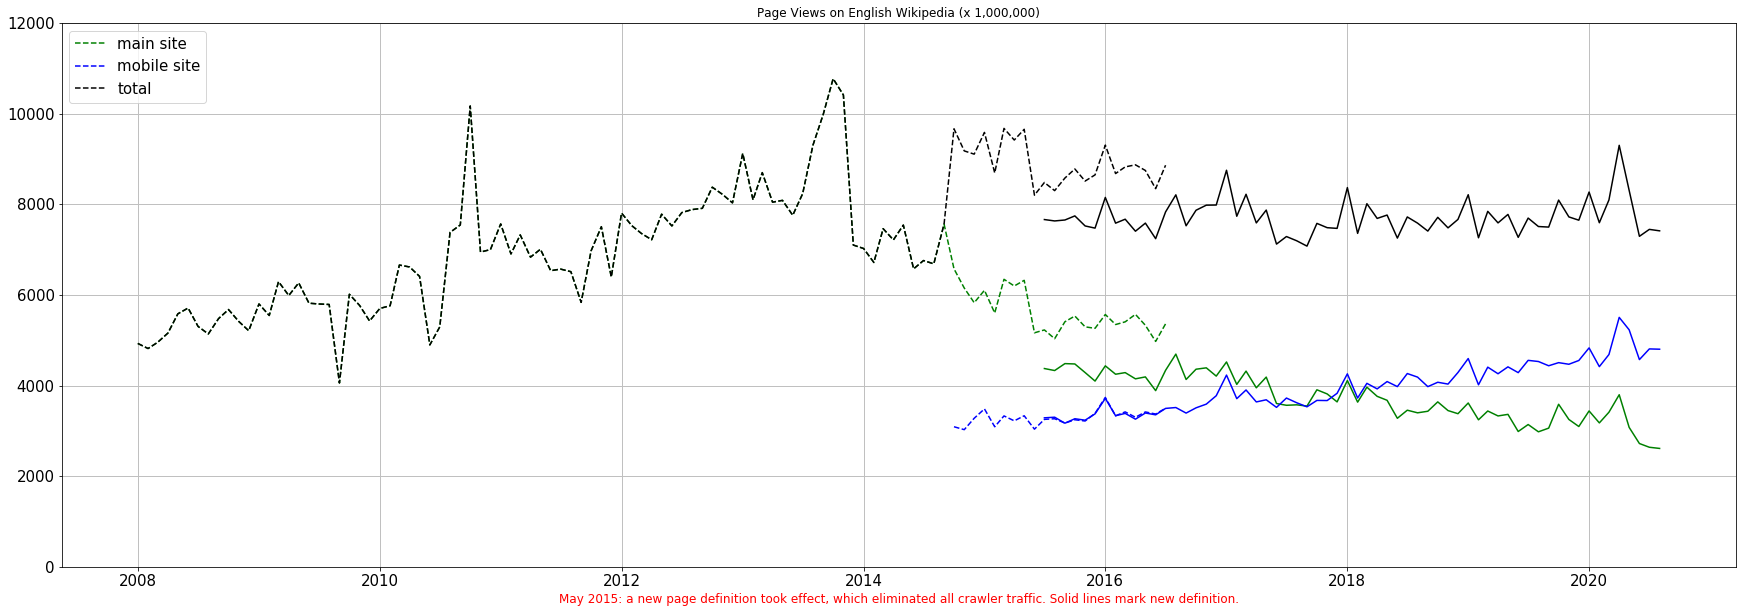

In [25]:
x = ndf['date']

# Scaling factor
scale_constant = 1000000

# Specify size of the figure
plt.figure(figsize=(30,10))

# Plotting 6 lines for 6 different view counts
plt.plot(x,ndf['pagecount_desktop_views']/scale_constant, linestyle='dashed', color = 'green', label = 'main site')
plt.plot(x,ndf['pageview_desktop_views']/scale_constant, linestyle='solid', color = 'green')
plt.plot(x,ndf['pagecount_mobile_views']/scale_constant, linestyle='dashed', color = 'blue', label = 'mobile site')
plt.plot(x,ndf['pageview_mobile_views']/scale_constant, linestyle='solid', color = 'blue')
plt.plot(x,ndf['pagecount_all_views']/scale_constant, linestyle='dashed', color = 'black', label = 'total')
plt.plot(x,ndf['pageview_all_views']/scale_constant, linestyle='solid', color = 'black')

# Adjusting decorative settings
plt.grid(color='silver', linestyle='-', linewidth=1)
plt.ylim([0,12000])
plt.tick_params(axis='both', which='major', labelsize=15)

# Adding xlabel, legend and title
plt.xlabel("May 2015: a new page definition took effect, which eliminated all crawler traffic. Solid lines mark new definition.", color = 'red', size='large')
plt.legend(loc='upper left', prop={'size': 15})
plt.title("Page Views on English Wikipedia (x 1,000,000)")

# Save figure as png file
plt.savefig("PageViews_on_English_Wikipedia.png")
# Plotting the graph
plt.show()

**Thank you!**